In [7]:
!pip install scipy

In [6]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 4.0 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.1 MB 4.4 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 4.7 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 5.0 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 5.4 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 6.7 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   - -------------------------------------- 1.8/41

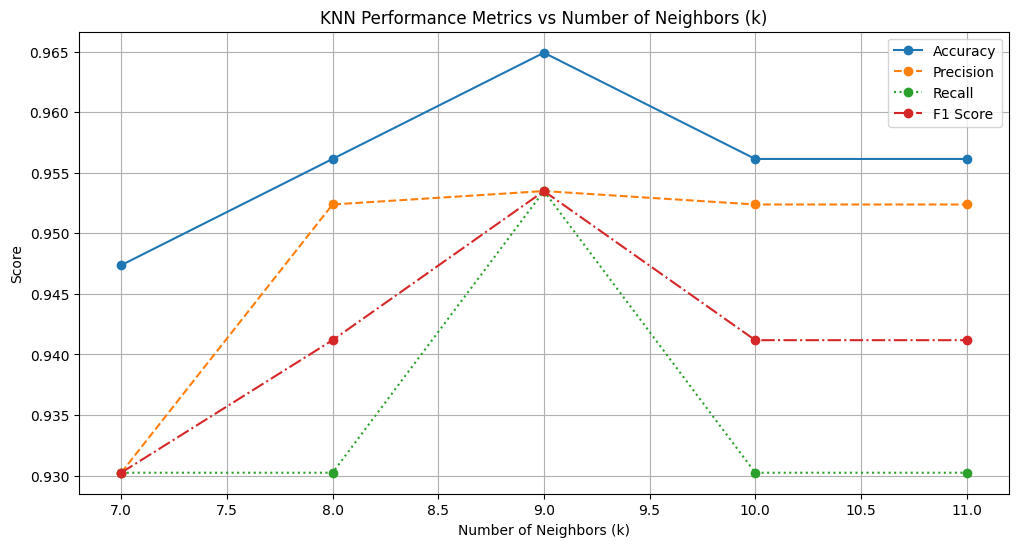

Best k: 9
Confusion Matrix (Best k):
[[69  2]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy (Best k): 0.9649
Confusion Matrix (PCA):
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy (PCA): 0.9561


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


data=pd.read_csv(r"data.csv")

data = data.drop(columns=['id', 'Unnamed: 32'])  # Drop 'id' and 'Unnamed: 32'
data = data.dropna()  # Drop rows with NaN values
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # M=1, B=0

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_knn(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1

k_values = list(range(7,12))
results = [evaluate_knn(k) for k in k_values]

accuracies, precisions, recalls, f1_scores = zip(*results)
val=list(range(8,10))
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.plot(k_values, precisions, marker='o', linestyle='dashed', label='Precision')
plt.plot(k_values, recalls, marker='o', linestyle='dotted', label='Recall')
plt.plot(k_values, f1_scores, marker='o', linestyle='dashdot', label='F1 Score')
plt.title('KNN Performance Metrics vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"Best k: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

print("Confusion Matrix (Best k):")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(f'Accuracy (Best k): {accuracy_score(y_test, y_pred_best):.4f}')

pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

print("Confusion Matrix (PCA):")
print(confusion_matrix(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))
print(f'Accuracy (PCA): {accuracy_score(y_test, y_pred_pca):.4f}')



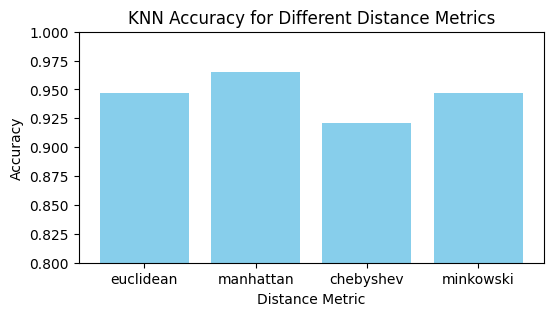

Accuracy with euclidean distance: 0.9474
Accuracy with manhattan distance: 0.9649
Accuracy with chebyshev distance: 0.9211
Accuracy with minkowski distance: 0.9474


In [11]:
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
accuracies = {}

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)  # Using a fixed k value for comparison
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[metric] = accuracy

plt.figure(figsize=(6,3))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('KNN Accuracy for Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.show()

# Print the results
for metric, accuracy in accuracies.items():
    print(f"Accuracy with {metric} distance: {accuracy:.4f}")

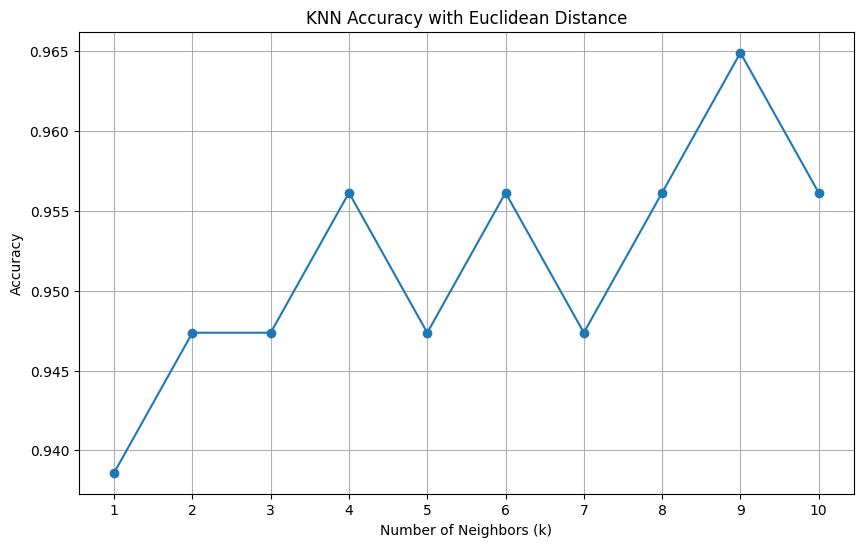

In [12]:


# Function to evaluate KNN with Euclidean distance
def evaluate_knn_euclidean(max_neighbors):
    k_values = range(1, max_neighbors + 1)
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return k_values, accuracies

# Set maximum number of neighbors to evaluate
max_neighbors = 10
k_values, accuracies = evaluate_knn_euclidean(max_neighbors)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy with Euclidean Distance')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)  # Set x-ticks to be all k values
plt.ylim()  # Accuracy ranges from 0 to 1
plt.grid()
plt.show()

NameError: name 'xx' is not defined

<Figure size 1200x800 with 0 Axes>

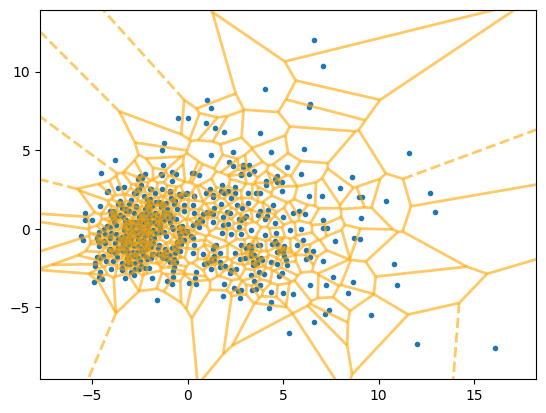

In [13]:
from scipy.spatial import Voronoi, voronoi_plot_2d


plt.figure(figsize=(12, 8))

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
pca_vis = PCA(n_components=2)
X_combined_pca = pca_vis.fit_transform(X_combined)

vor = Voronoi(X_combined_pca)

voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6)
plt.contourf(xx, yy, Z, alpha=0.4)
#scatter = plt.scatter(X_combined_pca[:, 0], X_combined_pca[:, 1], c=y_combined, edgecolor='k', cmap=plt.cm.coolwarm)

plt.title('KNN Classifier Voronoi Diagram')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=[0, 1], label='Class Label (B=0, M=1)')
plt.legend()
plt.show()